# SAGE Testing

This tests the implementation of Sparse Additive Generative Model of Text (SAGE) on a small subset of our data.

In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons
%matplotlib inline

sys.path.append("../src")
import sage

flatten = lambda l: [item for sublist in l for item in sublist]

In [2]:
ekphrasis_processor = TextPreProcessor(
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user', 'time', 'date', 'number'],  # normalize terms
    fix_html=True,  # fix HTML tokens  
    segmenter="english",  # corpus for word segmentation
    corrector="english",  # corpus for spell correction
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # unpack contractions 
    spell_correct_elong=False,  # spell correction for elongated words
    tokenizer=SocialTokenizer(lowercase=True).tokenize,  # tokenize words 
    dicts=[emoticons]  # replace emojis with words
)

Reading english - 1grams ...
Reading english - 2grams ...
Reading english - 1grams ...


In [3]:
train = pd.read_csv("/home/dfsnow/rbans/data/main_data_sample.csv", nrows=100000)
hate = pd.read_csv("/home/dfsnow/rbans/data/test_training_sample_hate.csv", nrows=20000)

In [4]:
train_counts = dict(Counter(flatten([(ekphrasis_processor.pre_process_doc(body)) for body in train.body])))
hate_counts = dict(Counter(flatten([(ekphrasis_processor.pre_process_doc(body)) for body in hate.body])))

In [5]:
hate_vocab = [word for word,count in Counter(hate_counts).most_common(3000)]

In [6]:
x_hate = np.array([hate_counts.get(word,0) for word in hate_vocab])
x_base = np.array([train_counts.get(word,0) for word in hate_vocab]) + 1.

In [7]:
mu = np.log(x_base) - np.log(x_base.sum())

In [8]:
eta = sage.estimate(x_hate, mu)

Print words that are especially frequent hate posts compared to baseline

In [9]:
print(sage.topK(eta,hate_vocab,100))

['░', '▓', '▒', 'spez', 'systemflawed', 'flawed', 'niggers', 'fatties', 'voat', 'hams', 'bigot', 'globalists', 'wew', 'gamergate', 'pizzagate', 'redpill', 'censors', 'shitlords', 'cucks', 'centipede', 'redacted', 'anita', 'lad', 'concessions', 'lightening', 'incel', 'nigger', 'shitlord', 'illegals', 'maga', 'trp', 'bmi', 'recount', 'devious1087', 'botsbyliam', 'cucked', 'centipedes', 'feminists', 'ctr', 'patriarchy', 'vaccinated', 'gawker', 'archived', 'romney', 'gg', 'kia', 'mgtow', 'incels', 'censorship', 'patriot', 'electors', 'soros', 'cuck', 'merry', 'satanic', 'the_donald', 'feminist', 't_d', 'pedo', 'normies', 'coat', 'iq', 'tucker', 'kek', 'sjw', 'gamers', 'feminism', 'globalism', 'brigading', 'misogyny', 'globalist', 'fatty', 'pedophile', 'sjws', 'jews', 'wu', 'podesta', 'degeneracy', 'msm', 'comrade', 'pedophiles', 'gays', 'chad', 'asians', 'system', 'admins', 'pede', 'obese', 'vaccines', 'testosterone', 'pepe', 'leftists', 'pol', '#[', 'btfo', 'coats', 'supremacy', 'libs', '

Print words that are especially infrequent in hate posts

In [10]:
print(sage.topK(-eta,hate_vocab,100))

['players', 'season', '|', '%', '^^', 'player', '█', 'de', 'la', 'hi', 'fans', 'card', 'team', '3', 'switch', 'ball', '+', 'league', 'performed', '7', 'pc', 'series', '8', '6', 'app', 'moderators', 'match', 'g', 'map', '2', 'play', '<annoyed>', 'concerns', 'round', 'playing', 'luck', 'damage', 'played', 'bought', 'available', '<money>', 'product', 'price', '<tong>', 'submission', 'game', 'compose', 'thanks', 'automatically', 'contact', 'box', '<happy>', 'k', 'characters', 'store', '5', 'w', '<', 'recommend', 'depends', 'submit', 'cheap', 'driving', 'slow', '&', 'buying', 'sell', '0', 'trade', 'message', 'drive', 'o', 'range', 'st', 'games', 'roll', 'review', '<time>', 'questions', 'excited', '1', 'skills', 'remove', 'loved', 'music', 'brand', 'car', 'wiki', 'dark', 'expensive', 'track', 'shop', 'c', 'bed', 'fun', 'search', 'overall', 'add', 'final', 'favorite']


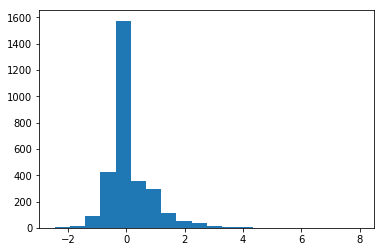

In [11]:
plt.hist(eta,20);

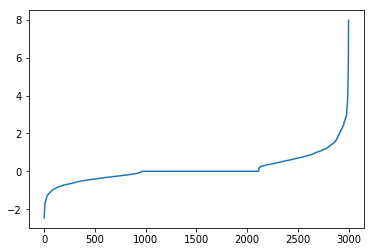

In [12]:
plt.plot(sorted(eta));